In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


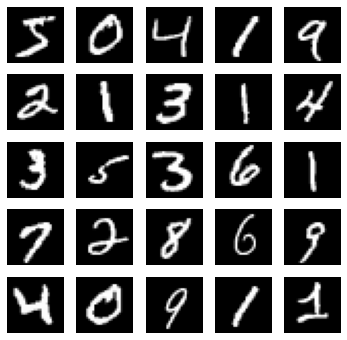

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')

plt.show()

In [3]:
import numpy as np

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_tetst = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), 
               kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = cnn.fit(x_train, y_train, batch_size=128, epochs=30, 
                   validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 36s 9ms/step - loss: 0.2378 - accuracy: 0.9273 - val_loss: 8.7069 - val_accuracy: 0.9810
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0845 - accuracy: 0.9752 - val_loss: 5.5231 - val_accuracy: 0.9856
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 5.4463 - val_accuracy: 0.9893
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 5.0427 - val_accuracy: 0.9887
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 4.5475 - val_accuracy: 0.9900
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 4.7619 - val_accuracy: 0.9895
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 8.0614 - val_accuracy: 0.9872
Epoch

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 12.5665 - accuracy: 0.9905


[12.566506385803223, 0.9904999732971191]

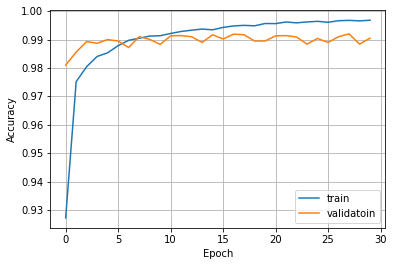

In [6]:
import matplotlib.pyplot as plt

plt.plot(training.history['accuracy'], label='train')
plt.plot(training.history['val_accuracy'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

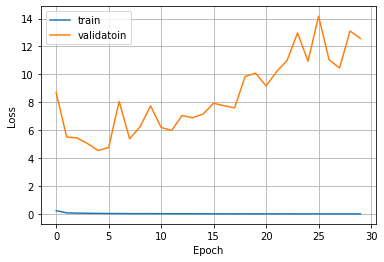

In [7]:
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

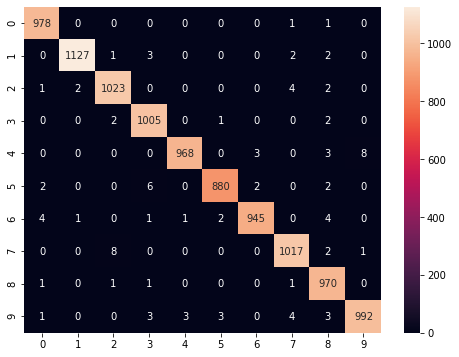

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))

p = cnn.predict(x_test)
c = confusion_matrix(y_test, np.argmax(p, axis=1))

sns.heatmap(c, annot=True, fmt='d')
plt.show()

In [9]:
print(c)
print('\n')

for i in range(10):
  print(('%d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(c[i]), np.sum(c[i]), np.max(c[i])/np.sum(c[i])))

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1127    1    3    0    0    0    2    2    0]
 [   1    2 1023    0    0    0    0    4    2    0]
 [   0    0    2 1005    0    1    0    0    2    0]
 [   0    0    0    0  968    0    3    0    3    8]
 [   2    0    0    6    0  880    2    0    2    0]
 [   4    1    0    1    1    2  945    0    4    0]
 [   0    0    8    0    0    0    0 1017    2    1]
 [   1    0    1    1    0    0    0    1  970    0]
 [   1    0    0    3    3    3    0    4    3  992]]


0	 (978/980)	accuracy = 0.998
1	 (1127/1135)	accuracy = 0.993
2	 (1023/1032)	accuracy = 0.991
3	 (1005/1010)	accuracy = 0.995
4	 (968/982)	accuracy = 0.986
5	 (880/892)	accuracy = 0.987
6	 (945/958)	accuracy = 0.986
7	 (1017/1028)	accuracy = 0.989
8	 (970/974)	accuracy = 0.996
9	 (992/1009)	accuracy = 0.983
